In [1]:

from dask.distributed import Client
client = Client(scheduler_file='/proj/jayeon/mpi/scheduler.json')  
client

<Client: 'tcp://203.247.189.223:34241' processes=0 threads=0, memory=0 B>

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
#import pystuff as ps
import cartopy.crs as ccrs
import cartopy.feature as cf
import seaborn as sns
import matplotlib.patches as patches
from scipy import stats
import cmocean
import glob
from cmcrameri import cm
from tqdm.notebook import tqdm_notebook

In [4]:
import warnings
warnings.simplefilter(action='ignore')

In [7]:
# load variables at each periods 
t_scaling = xr.open_dataset('/proj/shared_data/awicm3/Paper/TCo1279/Code/Figure7/t_scaling.nc')['t_scaling']
ws_scaling = xr.open_dataset('/proj/shared_data/awicm3/Paper/TCo1279/Code/Figure7/ws_scaling.nc')['ws_scaling']
pr_scaling = xr.open_dataset('/proj/shared_data/awicm3/Paper/TCo1279/Code/Figure7/pr_scaling.nc')['pr_scaling']

t_2000 = xr.open_dataset('/proj/shared_data/awicm3/Paper/TCo1279/Code/Figure7/t1279.2t.m.nc')['2t']
ws_2000 = xr.open_dataset('/proj/shared_data/awicm3/Paper/TCo1279/Code/Figure7/t1279.10ws.m.nc')['10ws']
pr_2000 = xr.open_dataset('/proj/shared_data/awicm3/Paper/TCo1279/Code/Figure7/t1279.pr.m.nc')['pr']

In [8]:
t_2000 = t_2000.squeeze() - 273.15
ws_2000 = ws_2000.squeeze()
pr_2000 = pr_2000.squeeze() * 8000

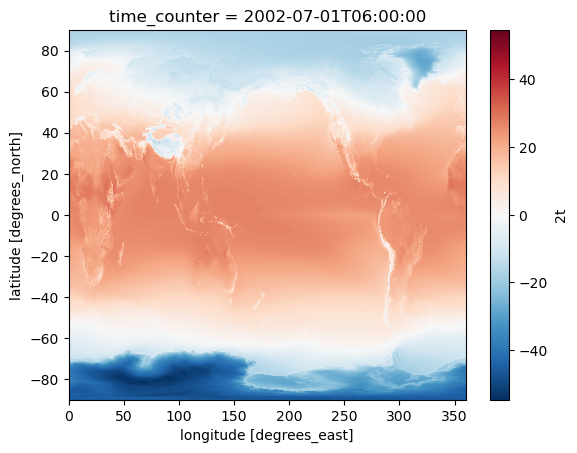

In [9]:
(t_2000).plot()

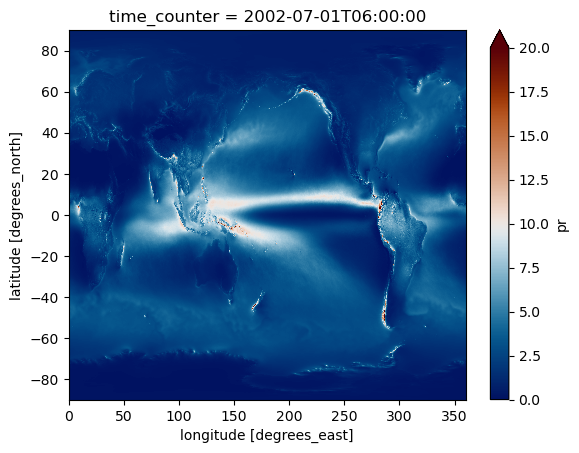

In [10]:
pr_2000.plot(vmin=0, vmax=20, cmap=cm.vik)

  0%|          | 0/6 [00:00<?, ?it/s]

CPU times: user 35min 46s, sys: 14.4 s, total: 36min
Wall time: 36min 5s


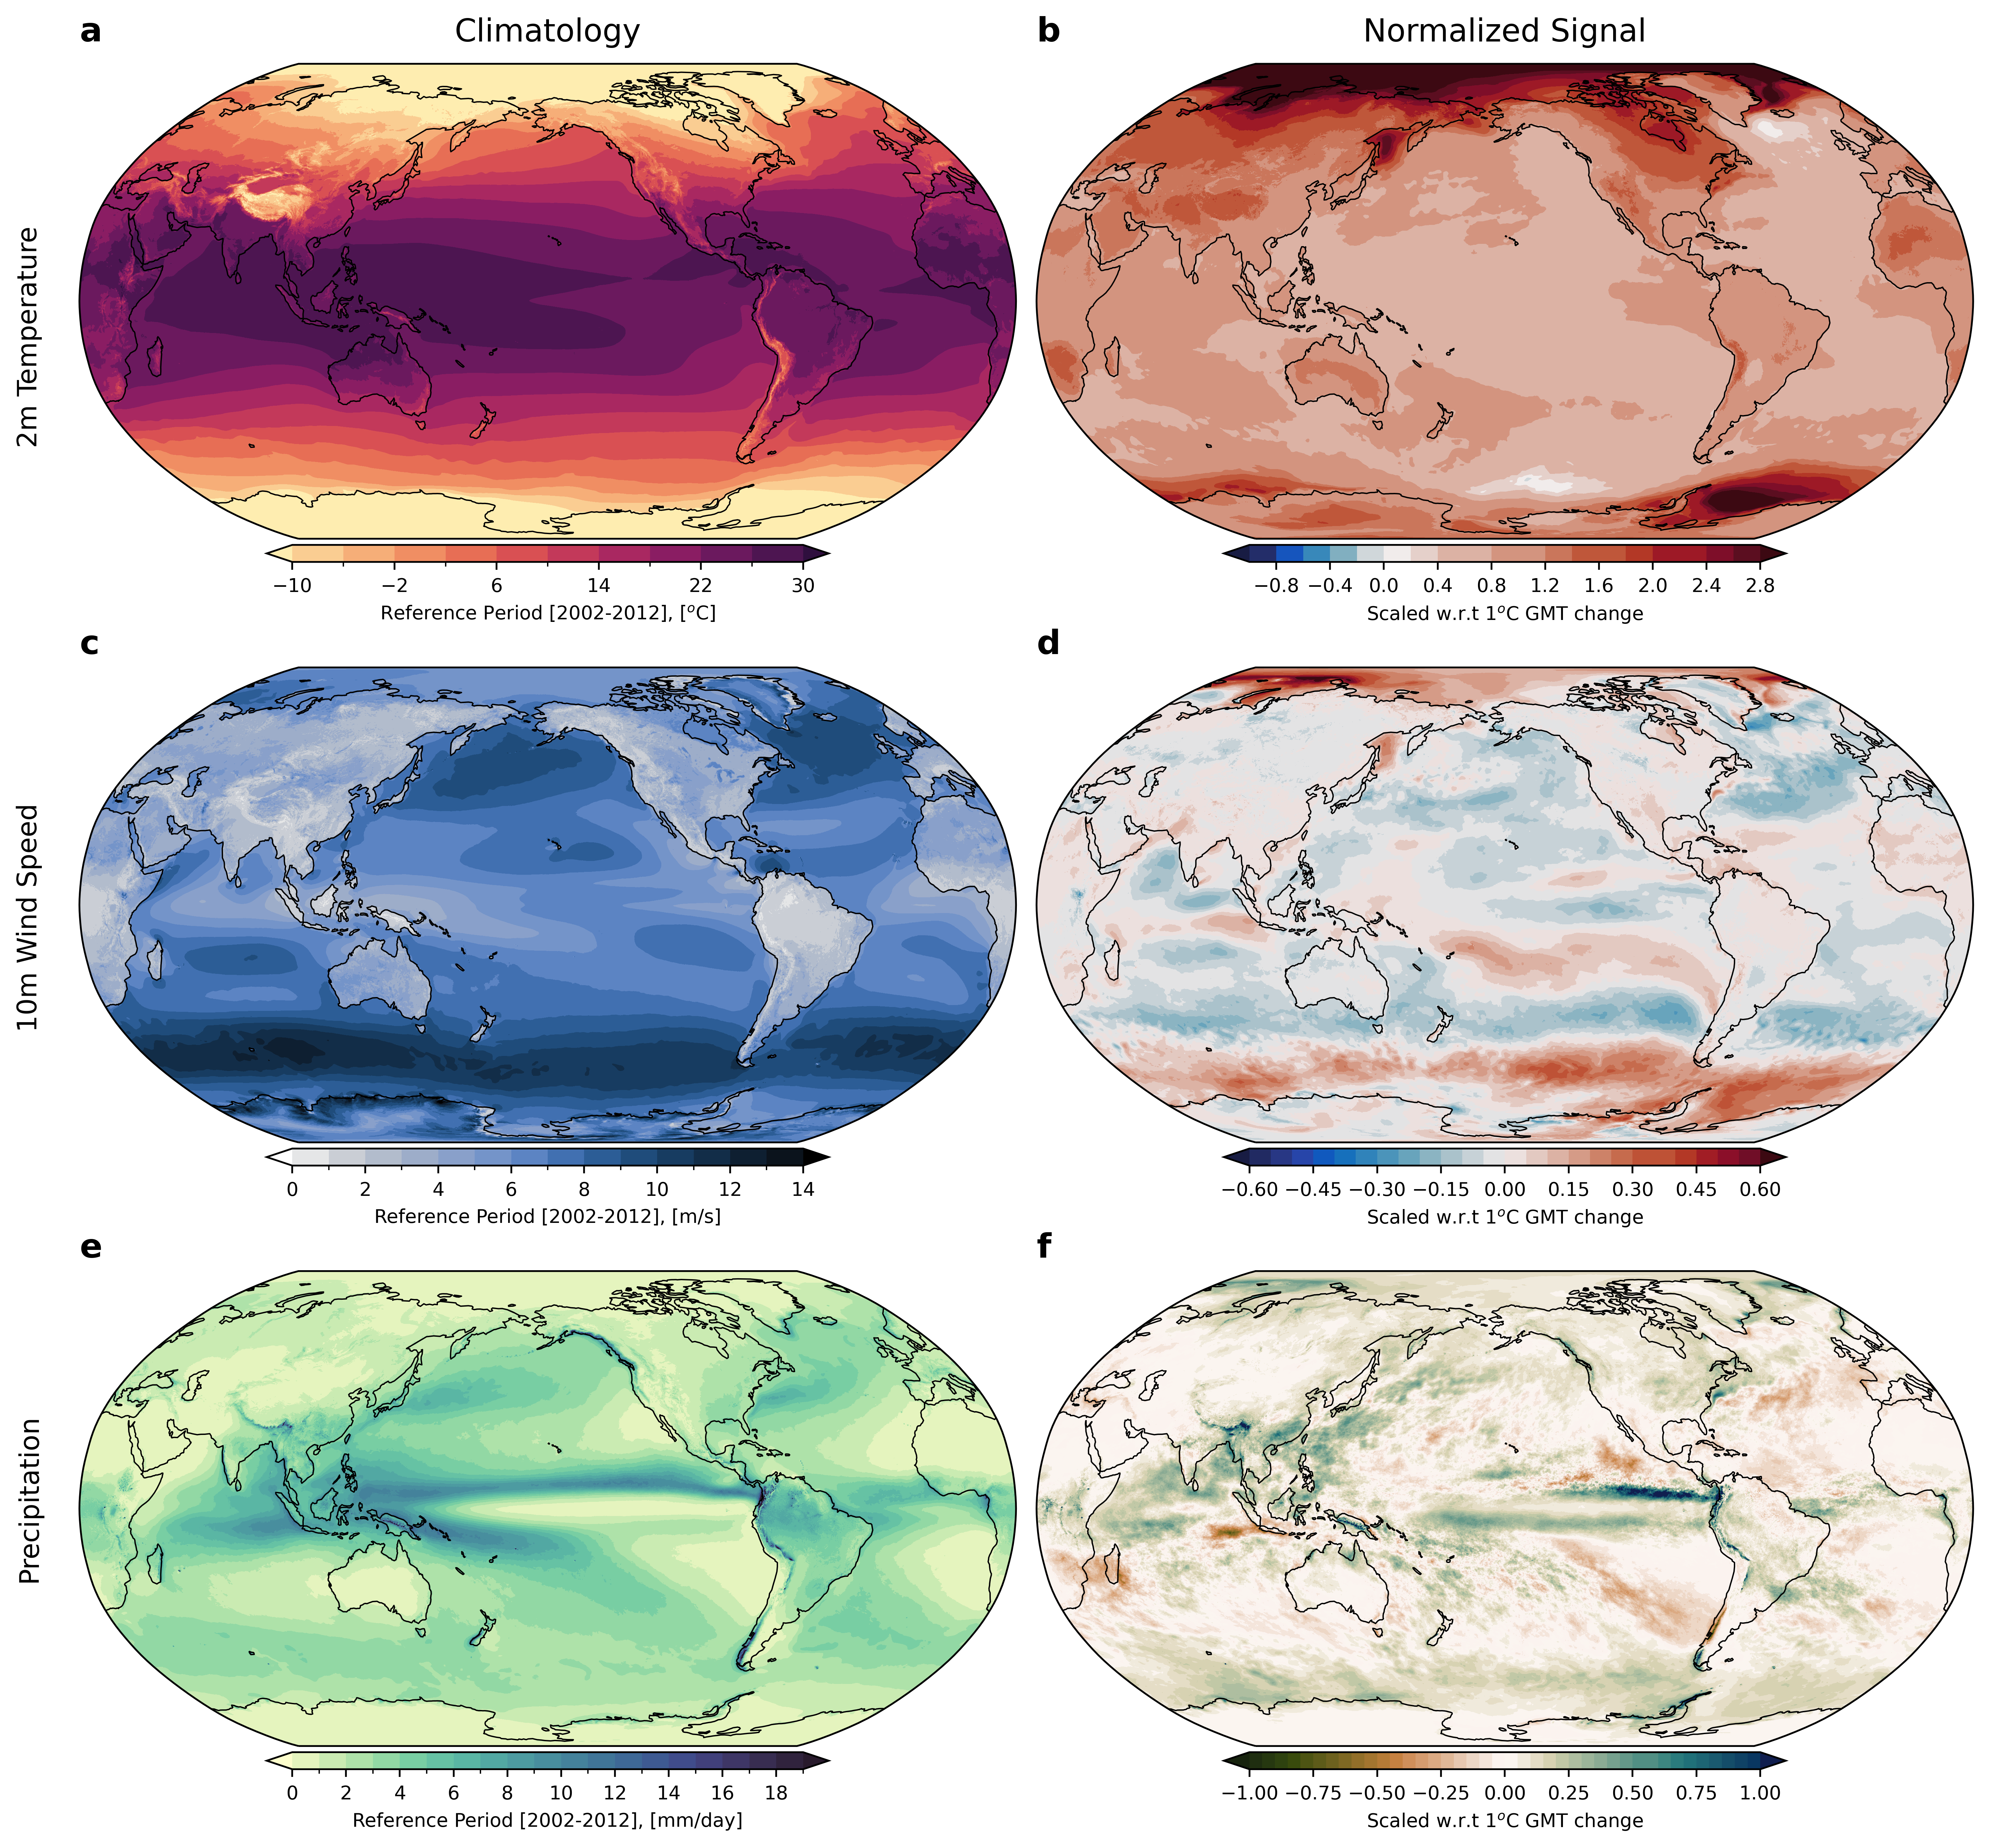

In [11]:
%%time
plt.rcParams.update({'font.size': 8.5})
fig,ax = plt.subplots(3,2,figsize=(18.5, 19), dpi=500, facecolor='w', edgecolor='k',subplot_kw={'projection': ccrs.Robinson(central_longitude=200)})

import cmocean
import matplotlib.colors as mcolors
titlesM = ['Climatology', 'Normalized Signal']
titlesL = ['$\mathbf{a}$', '$\mathbf{b}$', '$\mathbf{c}$', '$\mathbf{d}$', '$\mathbf{e}$', '$\mathbf{f}$']
labels = ['2m Temperature', '10m Wind Speed', 'Precipitation']


fields=[ t_2000,  t_scaling, 
         ws_2000, ws_scaling,  
         pr_2000, pr_scaling]

levels=[np.arange(-10,34,4),   np.arange(-1,3,0.2), 
        np.arange(0,15,1), np.arange(-0.6,0.65,0.05),  
        np.arange(0,20,1), np.arange(-1,1.05,0.05)]

norms = [None, mcolors.TwoSlopeNorm(vmin=-1, vcenter=0, vmax=3),
         None, mcolors.TwoSlopeNorm(vmin=-0.6, vcenter=0, vmax=0.65),
         None, mcolors.TwoSlopeNorm(vmin=-1.0, vcenter=0, vmax=1.05)]

# Your cbar list
#cbar=[cm.nuuk, cm.vik,
#      cm.bilbao_r,  cm.vik,   
#      cm.lapaz_r,  cm.vik]

cbar=[cmocean.cm.matter, cmocean.cm.balance,
      cm.oslo_r, cmocean.cm.balance,   
      cmocean.cm.deep, cmocean.cm.tarn]
#      cmocean.cm.deep, 'BrBG']
units=[ 'Reference Period [2002-2012], [$^{o}$C]', 'Scaled w.r.t 1$^{o}$C GMT change',
        'Reference Period [2002-2012], [m/s]', 'Scaled w.r.t 1$^{o}$C GMT change', 
        'Reference Period [2002-2012], [mm/day]', 'Scaled w.r.t 1$^{o}$C GMT change']

for i,a in enumerate(tqdm_notebook(ax.flat)) :
      clabel=('%s'%units[i])
      cbar_kwargs={'orientation':'horizontal','pad':0.01,'shrink':0.6, 'label':clabel, 'aspect':33}
      fields[i].plot.contourf(ax=a,transform=ccrs.PlateCarree(),levels=levels[i],norm=norms[i], cbar_kwargs=cbar_kwargs,cmap=cbar[i], extend='both')
      #a.add_feature(cf.LAND,color='grey')
      a.coastlines(linewidth=0.6,color='black')
      a.set_global()  

for i, label in enumerate(labels):
    fig.text(0.29, 0.86 - i * 0.19, label, transform=fig.transFigure, fontsize=12, va='center', ha='center', rotation=90)
   
for i, a in enumerate(ax.flat):
    a.set_title('%s' % titlesL[i], size=15, loc='left')

    if i <= 1:
        a.set_title('%s' % (titlesM[i]), size=14, y=1.0, pad=10)
    else:
        a.set_title('')
            
plt.tight_layout(rect=[0.3, 0.36, 0.95, 0.97])
plt.savefig('/proj/shared_data/awicm3/Paper/TCo1279/Code/Figure7/Figure7.png',dpi=500, bbox_inches = 'tight')